**This work deals with a model to predict the healthcare cost using the fusion of ML and DL. The method we have proposed is Deep Hyrbid Learning. Tabular data with a regression problem to solve always inclines towards machine learning. Deep Learning is much popular for the imagess but not restricted only to it. DL is always complex for tabular data but what if we can use both ml and dl. My idea is not to ensemble which makes it much more complex rather use the benefits of both the ideologies. ML is simple, faster to model and learn but deep learning isnt. On the other hand Neural networks has the ability to short down the important features in a very huge dataset on its own without any feature selection work unlike we do in Machine Learning. Even though there are techniques around to select features for ML models. Deep learning is much effective in coming with the important features. So we use deep learning model on the data to extract important features and use those features on a machine learning model to get a better accuracy**

# Random Forest - Phase 1

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

# To ignore any warnings
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/RF+NN/Inpatient_sparcs.csv',header=None)

In [ ]:
df.shape

(2343570, 34)

In [ ]:
df.head().T

,0,1,2,3,4
0,Hospital Service Area,Hudson Valley,Hudson Valley,Hudson Valley,Hudson Valley
1,Hospital County,Westchester,Westchester,Westchester,Westchester
2,Operating Certificate Number,5903001,5903001,5903001,5903001
3,Permanent Facility Id,001061,001061,001061,001061
4,Facility Name,Montefiore Mount Vernon Hospital,Montefiore Mount Vernon Hospital,Montefiore Mount Vernon Hospital,Montefiore Mount Vernon Hospital
5,Age Group,30 to 49,50 to 69,30 to 49,50 to 69
6,Zip Code - 3 digits,NaN,105,105,105
7,Gender,M,M,F,F
8,Race,White,White,White,White
9,Ethnicity,Not Span/Hispanic,Spanish/Hispanic,Unknown,Not Span/Hispanic


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
1,Hudson Valley,Westchester,5903001,001061,Montefiore Mount Vernon Hospital,30 to 49,NaN,M,White,Not Span/Hispanic,...,Minor,Medical,Medicare,Medicare,Self-Pay,NaN,N,N,114168.00,40464.04
2,Hudson Valley,Westchester,5903001,001061,Montefiore Mount Vernon Hospital,50 to 69,105,M,White,Spanish/Hispanic,...,Moderate,Medical,Medicaid,Medicaid,Self-Pay,NaN,N,N,58517.00,26046.50
3,Hudson Valley,Westchester,5903001,001061,Montefiore Mount Vernon Hospital,30 to 49,105,F,White,Unknown,...,Moderate,Medical,Department of Corrections,Self-Pay,NaN,NaN,N,N,39647.04,17397.59
4,Hudson Valley,Westchester,5903001,001061,Montefiore Mount Vernon Hospital,50 to 69,105,F,White,Not Span/Hispanic,...,Moderate,Medical,Medicaid,Medicaid,Self-Pay,NaN,N,N,36031.09,16118.84


In [ ]:
headers = ["Hospital_Service_Area","Hospital_County","Operating_Certificate_Number","Permanent_Facility_Id","Facility_Name","Age_Group","Zip_Code","Gender","Race","Ethnicity","Length_of_Stay","Type_of_Admission","Patient_Disposition","Discharge_Year","CCS_Diagnosis_Code","CCS_Diagnosis_Description","CCS_Procedure_Code","CCS_Procedure_Description","APR-DRG_Code","APR_DRG_Description","APR_MDC_Code","APR_MDC_Description","APR_Severity_of_Illness_Code","APR_Severity_of_Illness_Description","APR_Risk_of_Mortality","APR_Medical_Surgical_Description","Payment_Typology1","Payment_Typology2","Payment_Typology3","Birth_Weight","Abortion_Edit_Indicator","Emergency_Department_Indicator","Total_Charges","Total_Costs"]

In [ ]:
df.columns = headers

In [ ]:
pd.options.display.max_columns = 40

In [ ]:
df = df.iloc[1:, :]

In [ ]:
df.head(10)

,Hospital_Service_Area,Hospital_County,Operating_Certificate_Number,Permanent_Facility_Id,Facility_Name,Age_Group,Zip_Code,Gender,Race,Ethnicity,Length_of_Stay,Type_of_Admission,Patient_Disposition,Discharge_Year,CCS_Diagnosis_Code,CCS_Diagnosis_Description,CCS_Procedure_Code,CCS_Procedure_Description,APR-DRG_Code,APR_DRG_Description,APR_MDC_Code,APR_MDC_Description,APR_Severity_of_Illness_Code,APR_Severity_of_Illness_Description,APR_Risk_of_Mortality,APR_Medical_Surgical_Description,Payment_Typology1,Payment_Typology2,Payment_Typology3,Birth_Weight,Abortion_Edit_Indicator,Emergency_Department_Indicator,Total_Charges,Total_Costs
1,Hudson Valley,Westchester,5903001,001061,Montefiore Mount Vernon Hospital,30 to 49,NaN,M,White,Not Span/Hispanic,21,Elective,Home or Self Care,2017,659,Schizophrenia and other psychotic disorders,000,NO PROC,750,Schizophrenia,19,Mental Diseases and Disorders,2,Moderate,Minor,Medical,Medicare,Medicare,Self-Pay,NaN,N,N,114168.00,40464.04
2,Hudson Valley,Westchester,5903001,001061,Montefiore Mount Vernon Hospital,50 to 69,105,M,White,Spanish/Hispanic,8,Emergency,Skilled Nursing Home,2017,099,Hypertension with complications and secondary ...,108,INDWELLING CATHETER,194,Heart failure,05,Diseases and Disorders of the Circulatory System,3,Major,Moderate,Medical,Medicaid,Medicaid,Self-Pay,NaN,N,N,58517.00,26046.50
3,Hudson Valley,Westchester,5903001,001061,Montefiore Mount Vernon Hospital,30 to 49,105,F,White,Unknown,6,Emergency,Court/Law Enforcement,2017,161,Other diseases of kidney and ureters,102,URETERAL CATHETERIZATN,465,Urinary stones & acquired upper urinary tract ...,11,Diseases and Disorders of the Kidney and Urina...,2,Moderate,Moderate,Medical,Department of Corrections,Self-Pay,NaN,NaN,N,N,39647.04,17397.59
4,Hudson Valley,Westchester,5903001,001061,Montefiore Mount Vernon Hospital,50 to 69,105,F,White,Not Span/Hispanic,4,Emergency,Skilled Nursing Home,2017,238,Complications of surgical procedures or medica...,222,BLOOD TRANSFUSION,721,"Post-operative, post-traumatic, other device i...",18,"Infectious and Parasitic Diseases, Systemic or...",2,Moderate,Moderate,Medical,Medicaid,Medicaid,Self-Pay,NaN,N,N,36031.09,16118.84
5,Hudson Valley,Westchester,5903001,001061,Montefiore Mount Vernon Hospital,18 to 29,105,F,White,Spanish/Hispanic,4,Emergency,Court/Law Enforcement,2017,002,Septicemia (except in labor),000,NO PROC,720,Septicemia & disseminated infections,18,"Infectious and Parasitic Diseases, Systemic or...",2,Moderate,Minor,Medical,Department of Corrections,Self-Pay,NaN,NaN,N,N,30534.00,11921.05
6,Hudson Valley,Westchester,5903001,001061,Montefiore Mount Vernon Hospital,50 to 69,105,M,Black/African American,Not Span/Hispanic,3,Emergency,Short-term Hospital,2017,660,Alcohol-related disorders,222,BLOOD TRANSFUSION,280,Alcoholic liver disease,07,Diseases and Disorders of the Hepatobiliary Sy...,3,Major,Major,Medical,Medicare,Medicare,Self-Pay,NaN,N,N,49290.08,18503.26
7,Hudson Valley,Westchester,5903001,001061,Montefiore Mount Vernon Hospital,30 to 49,105,F,Black/African American,Not Span/Hispanic,3,Emergency,Court/Law Enforcement,2017,102,Nonspecific chest pain,000,NO PROC,203,Chest pain,05,Diseases and Disorders of the Circulatory System,2,Moderate,Minor,Medical,Medicaid,Self-Pay,NaN,NaN,N,N,20511.00,9103.80
8,Hudson Valley,Westchester,5903001,001061,Montefiore Mount Vernon Hospital,30 to 49,105,F,Black/African American,Unknown,4,Emergency,Home or Self Care,2017,050,Diabetes mellitus with complications,222,BLOOD TRANSFUSION,420,Diabetes,10,"Endocrine, Nutritional and Metabolic Diseases ...",3,Major,Major,Medical,Medicaid,Medicaid,Medicaid,NaN,N,N,55172.00,17682.94
9,Hudson Valley,Westchester,5903001,001061,Montefiore Mount Vernon Hospital,50 to 69,105,M,Black/African American,Not Span/Hispanic,4,Emergency,Home or Self Care,2017,245,Syncope,231,OTHER THERAPEUTIC PRCS,204,Syncope & collapse,05,Diseases and Disorders of the Circulatory System,1,Minor,Minor,Medical,Medicaid,Medicaid,Self-Pay,NaN,N,N,3

In [ ]:
df['Length_of_Stay'] = pd.to_numeric(df['Length_of_Stay'],errors = 'coerce')
df['Total_Costs'] = pd.to_numeric(df['Total_Costs'],errors = 'coerce')
df['Total_Charges'] = pd.to_numeric(df['Total_Charges'],errors = 'coerce')

In [ ]:
df.dtypes

Hospital_Service_Area                   object
Hospital_County                         object
Operating_Certificate_Number            object
Permanent_Facility_Id                   object
Facility_Name                           object
Age_Group                               object
Zip_Code                                object
Gender                                  object
Race                                    object
Ethnicity                               object
Length_of_Stay                         float64
Type_of_Admission                       object
Patient_Disposition                     object
Discharge_Year                          object
CCS_Diagnosis_Code                      object
CCS_Diagnosis_Description               object
CCS_Procedure_Code                      object
CCS_Procedure_Description               object
APR-DRG_Code                            object
APR_DRG_Description                     object
APR_MDC_Code                            object
APR_MDC_Descr

In [ ]:
df.isnull().sum(axis = 0)

Hospital_Service_Area                     5155
Hospital_County                           5155
Operating_Certificate_Number              5155
Permanent_Facility_Id                     5155
Facility_Name                                0
Age_Group                                    0
Zip_Code                                 39019
Gender                                       0
Race                                         0
Ethnicity                                    0
Length_of_Stay                            1739
Type_of_Admission                            0
Patient_Disposition                          0
Discharge_Year                               0
CCS_Diagnosis_Code                           0
CCS_Diagnosis_Description                    0
CCS_Procedure_Code                           0
CCS_Procedure_Description                    0
APR-DRG_Code                                 0
APR_DRG_Description                          0
APR_MDC_Code                                 0
APR_MDC_Descr

**Deletion of features which has a huge number of missing data**

In [ ]:
del df['Birth_Weight']

In [ ]:
del df['Payment_Typology3']

In [ ]:
del df['Payment_Typology2']

In [ ]:
df.isnull().sum()

Hospital_Service_Area                   5155
Hospital_County                         5155
Operating_Certificate_Number            5155
Permanent_Facility_Id                   5155
Facility_Name                              0
Age_Group                                  0
Zip_Code                               39019
Gender                                     0
Race                                       0
Ethnicity                                  0
Length_of_Stay                          1739
Type_of_Admission                          0
Patient_Disposition                        0
Discharge_Year                             0
CCS_Diagnosis_Code                         0
CCS_Diagnosis_Description                  0
CCS_Procedure_Code                         0
CCS_Procedure_Description                  0
APR-DRG_Code                               0
APR_DRG_Description                        0
APR_MDC_Code                               0
APR_MDC_Description                        0
APR_Severi

In [ ]:
df.shape

(2343569, 31)

**Removing Rows with Null values in any of the features**

In [ ]:
df.dropna(subset = ["Hospital_Service_Area"], inplace=True)

In [ ]:
df.dropna(subset = ["Hospital_County"], inplace=True)

In [ ]:
df.dropna(subset = ["Operating_Certificate_Number"], inplace=True)

In [ ]:
df.dropna(subset = ["Permanent_Facility_Id"], inplace=True)

In [ ]:
df.dropna(subset = ["APR_Severity_of_Illness_Description"], inplace=True)

In [ ]:
df.dropna(subset = ["APR_Risk_of_Mortality"], inplace=True)

In [ ]:
df.dropna(subset = ["Zip_Code"], inplace=True)

In [ ]:
df.dropna(subset = ["Length_of_Stay"], inplace=True)

In [ ]:
df.isnull().sum()

Hospital_Service_Area                  0
Hospital_County                        0
Operating_Certificate_Number           0
Permanent_Facility_Id                  0
Facility_Name                          0
Age_Group                              0
Zip_Code                               0
Gender                                 0
Race                                   0
Ethnicity                              0
Length_of_Stay                         0
Type_of_Admission                      0
Patient_Disposition                    0
Discharge_Year                         0
CCS_Diagnosis_Code                     0
CCS_Diagnosis_Description              0
CCS_Procedure_Code                     0
CCS_Procedure_Description              0
APR-DRG_Code                           0
APR_DRG_Description                    0
APR_MDC_Code                           0
APR_MDC_Description                    0
APR_Severity_of_Illness_Code           0
APR_Severity_of_Illness_Description    0
APR_Risk_of_Mort

No Feature has empty values now

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2302682 entries, 2 to 2343569
Data columns (total 31 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Hospital_Service_Area                object 
 1   Hospital_County                      object 
 2   Operating_Certificate_Number         object 
 3   Permanent_Facility_Id                object 
 4   Facility_Name                        object 
 5   Age_Group                            object 
 6   Zip_Code                             object 
 7   Gender                               object 
 8   Race                                 object 
 9   Ethnicity                            object 
 10  Length_of_Stay                       float64
 11  Type_of_Admission                    object 
 12  Patient_Disposition                  object 
 13  Discharge_Year                       object 
 14  CCS_Diagnosis_Code                   object 
 15  CCS_Diagnosis_Description       

### **Removal of the features which might not affect the healthcare cost**

In [ ]:
del df['Hospital_Service_Area']

In [ ]:
del df['Hospital_County']


In [ ]:
del df['Operating_Certificate_Number']

In [ ]:
del df['Permanent_Facility_Id']

In [ ]:
del df['Zip_Code']

In [ ]:
del df['Race']

In [ ]:
del df['Ethnicity']

In [ ]:
del df['Patient_Disposition']

In [ ]:
del df['Discharge_Year']

## ***Exploring the Data***

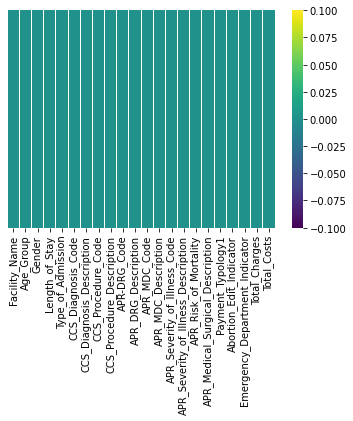

In [ ]:
# Checking the Missing Values by Visualiztion
sns.heatmap(df.isnull(), yticklabels=False, cmap= "viridis")

In [ ]:
df['APR_Risk_of_Mortality'].value_counts()

Minor       1313337
Moderate     500735
Major        372440
Extreme      116170
Name: APR_Risk_of_Mortality, dtype: int64

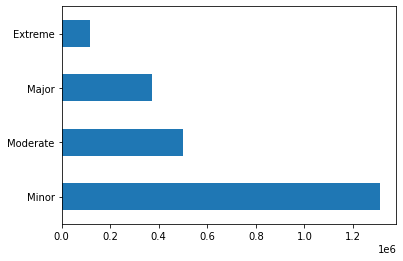

In [ ]:
df.APR_Risk_of_Mortality.value_counts().plot(kind='barh')

In [ ]:
df['APR_Medical_Surgical_Description'].value_counts()

Medical     1713122
Surgical     589560
Name: APR_Medical_Surgical_Description, dtype: int64

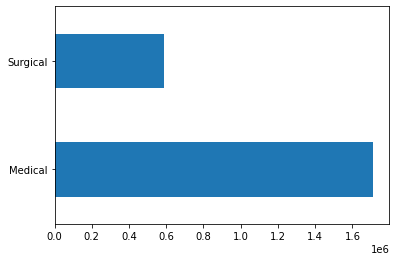

In [ ]:
df.APR_Medical_Surgical_Description.value_counts().plot(kind='barh')

In [ ]:
df['Payment_Typology1'].value_counts()

Medicare                     897426
Medicaid                     687928
Private Health Insurance     337882
Blue Cross/Blue Shield       258108
Self-Pay                      43242
Managed Care, Unspecified     31714
Miscellaneous/Other           27639
Federal/State/Local/VA        13986
Department of Corrections      2512
Unknown                        2245
Name: Payment_Typology1, dtype: int64

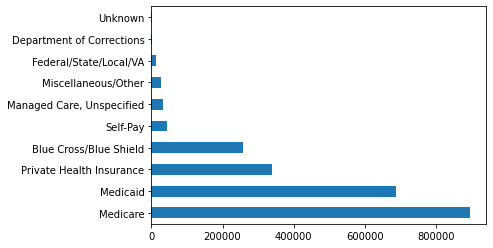

In [ ]:
df.Payment_Typology1.value_counts().plot(kind='barh')

In [ ]:
df['Abortion_Edit_Indicator'].value_counts()

N    2302682
Name: Abortion_Edit_Indicator, dtype: int64

Removing this feature as only few diagnosis deals with pregnancy or abortion

In [ ]:
del df['Abortion_Edit_Indicator']

In [ ]:
del df['Emergency_Department_Indicator']

Removing the duplicated rows

In [ ]:
df.duplicated().sum()

61349

In [ ]:
df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

,Facility_Name,Age_Group,Gender,Length_of_Stay,Type_of_Admission,CCS_Diagnosis_Code,CCS_Diagnosis_Description,CCS_Procedure_Code,CCS_Procedure_Description,APR-DRG_Code,APR_DRG_Description,APR_MDC_Code,APR_MDC_Description,APR_Severity_of_Illness_Code,APR_Severity_of_Illness_Description,APR_Risk_of_Mortality,APR_Medical_Surgical_Description,Payment_Typology1,Total_Charges,Total_Costs
2,Montefiore Mount Vernon Hospital,50 to 69,M,8.0,Emergency,099,Hypertension with complications and secondary ...,108,INDWELLING CATHETER,194,Heart failure,05,Diseases and Disorders of the Circulatory System,3,Major,Moderate,Medical,Medicaid,58517.00,26046.50
3,Montefiore Mount Vernon Hospital,30 to 49,F,6.0,Emergency,161,Other diseases of kidney and ureters,102,URETERAL CATHETERIZATN,465,Urinary stones & acquired upper urinary tract ...,11,Diseases and Disorders of the Kidney and Urina...,2,Moderate,Moderate,Medical,Department of Corrections,39647.04,17397.59
4,Montefiore Mount Vernon Hospital,50 to 69,F,4.0,Emergency,238,Complications of surgical procedures or medica...,222,BLOOD TRANSFUSION,721,"Post-operative, post-traumatic, other device i...",18,"Infectious and Parasitic Diseases, Systemic or...",2,Moderate,Moderate,Medical,Medicaid,36031.09,16118.84
5,Montefiore Mount Vernon Hospital,18 to 29,F,4.0,Emergency,002,Septicemia (except in labor),000,NO PROC,720,Septicemia & disseminated infections,18,"Infectious and Parasitic Diseases, Systemic or...",2,Moderate,Minor,Medical,Department of Corrections,30534.00,11921.05
6,Montefiore Mount Vernon Hospital,50 to 69,M,3.0,Emergency,660,Alcohol-related disorders,222,BLOOD TRANSFUSION,280,Alcoholic liver disease,07,Diseases and Disorders of the Hepatobiliary Sy...,3,Major,Major,Medical,Medicare,49290.08,18503.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2343564,Hospital for Special Surgery,50 to 69,M,8.0,Elective,238,Complications of surgical procedures or medica...,142,PARTIAL EXCISION BONE,309,Other significant hip and femur surgery,8,Diseases and Disorders of the Musculoskeletal ...,2,Moderate,Minor,Surgical,Private Health Insurance,93547.00,33621.00
2343565,Good Samaritan Hospital of Suffern,50 to 69,F,2.0,Elective,133,Other lower respiratory disease,36,LOBECTOMY/PNEUMONECTOMY,120,Major respiratory & chest procedures,4,Diseases and Disorders of the Respiratory System,1,Minor,Moderate,Surgical,Private Health Insurance,87545.08,16781.23
2343566,Good Samaritan Hospital of Suffern,50 to 69,F,2.0,Emergency,101,Coronary atherosclerosis and other heart disease,0,NO PROC,198,Angina pectoris & coronary atherosclerosis,5,Diseases and Disorders of the Circulatory System,2,Moderate,Moderate,Medical,Medicaid,31896.05,6003.38
2343568,Montefiore Med Center - Jack D Weiler Hosp of ...,70 or Older,F,2.0,Elective,25,Cancer of uterus,124,HYSTERECTOMY; AB/VAG,512,Uterine & adnexa procedures for non-ovarian & ...,13,Diseases and Disorders of the Female Reproduct...,2,Moderate,Minor,Surgical,Medicare,66399.81,13068.87


In [ ]:
df.reset_index(inplace = True)

df

,index,Facility_Name,Age_Group,Gender,Length_of_Stay,Type_of_Admission,CCS_Diagnosis_Code,CCS_Diagnosis_Description,CCS_Procedure_Code,CCS_Procedure_Description,APR-DRG_Code,APR_DRG_Description,APR_MDC_Code,APR_MDC_Description,APR_Severity_of_Illness_Code,APR_Severity_of_Illness_Description,APR_Risk_of_Mortality,APR_Medical_Surgical_Description,Payment_Typology1,Total_Charges,Total_Costs
0,2,Montefiore Mount Vernon Hospital,50 to 69,M,8.0,Emergency,099,Hypertension with complications and secondary ...,108,INDWELLING CATHETER,194,Heart failure,05,Diseases and Disorders of the Circulatory System,3,Major,Moderate,Medical,Medicaid,58517.00,26046.50
1,3,Montefiore Mount Vernon Hospital,30 to 49,F,6.0,Emergency,161,Other diseases of kidney and ureters,102,URETERAL CATHETERIZATN,465,Urinary stones & acquired upper urinary tract ...,11,Diseases and Disorders of the Kidney and Urina...,2,Moderate,Moderate,Medical,Department of Corrections,39647.04,17397.59
2,4,Montefiore Mount Vernon Hospital,50 to 69,F,4.0,Emergency,238,Complications of surgical procedures or medica...,222,BLOOD TRANSFUSION,721,"Post-operative, post-traumatic, other device i...",18,"Infectious and Parasitic Diseases, Systemic or...",2,Moderate,Moderate,Medical,Medicaid,36031.09,16118.84
3,5,Montefiore Mount Vernon Hospital,18 to 29,F,4.0,Emergency,002,Septicemia (except in labor),000,NO PROC,720,Septicemia & disseminated infections,18,"Infectious and Parasitic Diseases, Systemic or...",2,Moderate,Minor,Medical,Department of Corrections,30534.00,11921.05
4,6,Montefiore Mount Vernon Hospital,50 to 69,M,3.0,Emergency,660,Alcohol-related disorders,222,BLOOD TRANSFUSION,280,Alcoholic liver disease,07,Diseases and Disorders of the Hepatobiliary Sy...,3,Major,Major,Medical,Medicare,49290.08,18503.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2302677,2343564,Hospital for Special Surgery,50 to 69,M,8.0,Elective,238,Complications of surgical procedures or medica...,142,PARTIAL EXCISION BONE,309,Other significant hip and femur surgery,8,Diseases and Disorders of the Musculoskeletal ...,2,Moderate,Minor,Surgical,Private Health Insurance,93547.00,33621.00
2302678,2343565,Good Samaritan Hospital of Suffern,50 to 69,F,2.0,Elective,133,Other lower respiratory disease,36,LOBECTOMY/PNEUMONECTOMY,120,Major respiratory & chest procedures,4,Diseases and Disorders of the Respiratory System,1,Minor,Moderate,Surgical,Private Health Insurance,87545.08,16781.23
2302679,2343566,Good Samaritan Hospital of Suffern,50 to 69,F,2.0,Emergency,101,Coronary atherosclerosis and other heart disease,0,NO PROC,198,Angina pectoris & coronary atherosclerosis,5,Diseases and Disorders of the Circulatory System,2,Moderate,Moderate,Medical,Medicaid,31896.05,6003.38
2302680,2343568,Montefiore Med Center - Jack D Weiler Hosp of ...,70 or Older,F,2.0,Elective,25,Cancer of uterus,124,HYSTERECTOMY; AB/VAG,512,Uterine & adnexa procedures for non-ovarian & ...,13,Diseases and Disorders of the Female Reproduct...,2,Moderate,Minor,Surgical,Medicare,66399.81,13068.87


In [ ]:
del df['index']

In [ ]:
df.head()

,Facility_Name,Age_Group,Gender,Length_of_Stay,Type_of_Admission,CCS_Diagnosis_Code,CCS_Diagnosis_Description,CCS_Procedure_Code,CCS_Procedure_Description,APR-DRG_Code,APR_DRG_Description,APR_MDC_Code,APR_MDC_Description,APR_Severity_of_Illness_Code,APR_Severity_of_Illness_Description,APR_Risk_of_Mortality,APR_Medical_Surgical_Description,Payment_Typology1,Total_Charges,Total_Costs
0,Montefiore Mount Vernon Hospital,50 to 69,M,8.0,Emergency,099,Hypertension with complications and secondary ...,108,INDWELLING CATHETER,194,Heart failure,05,Diseases and Disorders of the Circulatory System,3,Major,Moderate,Medical,Medicaid,58517.00,26046.50
1,Montefiore Mount Vernon Hospital,30 to 49,F,6.0,Emergency,161,Other diseases of kidney and ureters,102,URETERAL CATHETERIZATN,465,Urinary stones & acquired upper urinary tract ...,11,Diseases and Disorders of the Kidney and Urina...,2,Moderate,Moderate,Medical,Department of Corrections,39647.04,17397.59
2,Montefiore Mount Vernon Hospital,50 to 69,F,4.0,Emergency,238,Complications of surgical procedures or medica...,222,BLOOD TRANSFUSION,721,"Post-operative, post-traumatic, other device i...",18,"Infectious and Parasitic Diseases, Systemic or...",2,Moderate,Moderate,Medical,Medicaid,36031.09,16118.84
3,Montefiore Mount Vernon Hospital,18 to 29,F,4.0,Emergency,002,Septicemia (except in labor),000,NO PROC,720,Septicemia & disseminated infections,18,"Infectious and Parasitic Diseases, Systemic or...",2,Moderate,Minor,Medical,Department of Corrections,30534.00,11921.05
4,Montefiore Mount Vernon Hospital,50 to 69,M,3.0,Emergency,660,Alcohol-related disorders,222,BLOOD TRANSFUSION,280,Alcoholic liver disease,07,Diseases and Disorders of the Hepatobiliary Sy...,3,Major,Major,Medical,Medicare,49290.08,18503.26


**Removing the diagnosis description codes as they do not satisfy the integer conditions. We will encode the description soon on our own**

In [ ]:
columns2=['Facility_Name', 'Age_Group', 'Gender', 'Length_of_Stay', 'Type_of_Admission', 'CCS_Diagnosis_Description', 'CCS_Procedure_Description','APR_DRG_Description','APR_MDC_Description','APR_Severity_of_Illness_Description','APR_Risk_of_Mortality','APR_Medical_Surgical_Description','Payment_Typology1','Total_Costs']

In [ ]:
df2=df

In [ ]:
df=df[columns2]

In [ ]:
df['Age_Group'].value_counts()

70 or Older    659132
50 to 69       646204
30 to 49       439330
0 to 17        331488
18 to 29       226528
Name: Age_Group, dtype: int64

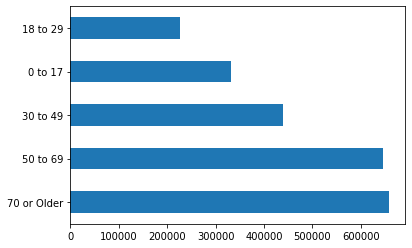

In [ ]:
df.Age_Group.value_counts().plot(kind='barh')

In [ ]:
df['Gender'].value_counts()

F    1275423
M    1027239
U         20
Name: Gender, dtype: int64

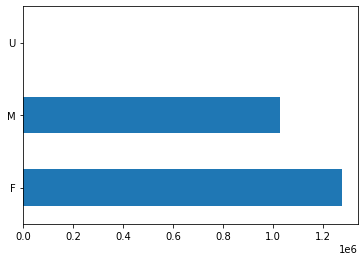

In [ ]:
df.Gender.value_counts().plot(kind='barh')

In [ ]:
#Different Number of Hospitals
n=len(df['Facility_Name'].unique())
print(n)

209


In [ ]:
df.shape

(2302682, 14)

In [ ]:
df.dtypes

Facility_Name                           object
Age_Group                               object
Gender                                  object
Length_of_Stay                         float64
Type_of_Admission                       object
CCS_Diagnosis_Description               object
CCS_Procedure_Description               object
APR_DRG_Description                     object
APR_MDC_Description                     object
APR_Severity_of_Illness_Description     object
APR_Risk_of_Mortality                   object
APR_Medical_Surgical_Description        object
Payment_Typology1                       object
Total_Costs                            float64
dtype: object

## **Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelenc=LabelEncoder()

In [ ]:
df['Facility_Name_Code'] = labelenc.fit_transform(df['Facility_Name'])

In [ ]:
df['Age_Group_Code'] = labelenc.fit_transform(df['Age_Group'])

In [ ]:
df['Gender_Code'] = labelenc.fit_transform(df['Gender'])

In [ ]:
df['Type_of_Admission_Code'] = labelenc.fit_transform(df['Type_of_Admission'])

In [ ]:
df['Risk_of_Mortality_Code'] = labelenc.fit_transform(df['APR_Risk_of_Mortality'])

In [ ]:
df['APR_DRG_Desc_Code'] = labelenc.fit_transform(df['APR_DRG_Description'])

In [ ]:
df['APR_MDC_Desc_Code'] = labelenc.fit_transform(df['APR_MDC_Description'])

In [ ]:
df['Illness_Code']= labelenc.fit_transform(df['APR_Severity_of_Illness_Description'])

In [ ]:
df['Surgical_Desc_Code'] = labelenc.fit_transform(df['APR_Medical_Surgical_Description'])

In [ ]:
df['Payment_Typology1_Code'] = labelenc.fit_transform(df['Payment_Typology1'])

In [ ]:
df['CCS_Diagnosis_Encode'] = labelenc.fit_transform(df['CCS_Diagnosis_Description'])

**Filtering down to the important columns**

In [ ]:
ft_df=['Facility_Name_Code','Age_Group_Code','Gender_Code','Length_of_Stay','Type_of_Admission_Code','CCS_Diagnosis_Encode','APR_DRG_Desc_Code','Illness_Code','Risk_of_Mortality_Code','Surgical_Desc_Code','Payment_Typology1_Code','Total_Costs']

In [ ]:
df3=df

In [ ]:
df=df[ft_df]

In [ ]:
df.dtypes

Facility_Name_Code          int64
Age_Group_Code              int64
Gender_Code                 int64
Length_of_Stay            float64
Type_of_Admission_Code      int64
CCS_Diagnosis_Encode        int64
APR_DRG_Desc_Code           int64
Illness_Code                int64
Risk_of_Mortality_Code      int64
Surgical_Desc_Code          int64
Payment_Typology1_Code      int64
Total_Costs               float64
dtype: object

**Correlation**

In [ ]:
df.corr()

,Facility_Name_Code,Age_Group_Code,Gender_Code,Length_of_Stay,Type_of_Admission_Code,CCS_Diagnosis_Encode,APR_DRG_Desc_Code,Illness_Code,Risk_of_Mortality_Code,Surgical_Desc_Code,Payment_Typology1_Code,Total_Costs
Facility_Name_Code,1.000000,0.013969,-0.005848,-0.004070,0.021481,-0.004358,0.007218,-0.021293,-0.015636,0.006665,-0.014395,0.019269
Age_Group_Code,0.013969,1.000000,0.022728,0.110151,-0.177003,-0.071467,-0.092314,-0.136189,-0.100481,0.121048,0.150420,0.093593
Gender_Code,-0.005848,0.022728,1.000000,0.055122,-0.009090,-0.083229,-0.084430,-0.043467,-0.016017,-0.032848,0.012700,0.037387
Length_of_Stay,-0.004070,0.110151,0.055122,1.000000,0.019077,0.037275,0.002041,-0.249370,-0.198687,0.044950,0.029553,0.488168
Type_of_Admission_Code,0.021481,-0.177003,-0.009090,0.019077,1.000000,-0.016353,0.053562,-0.021748,-0.018916,-0.137911,-0.035694,-0.004025
CCS_Diagnosis_Encode,-0.004358,-0.071467,-0.083229,0.037275,-0.016353,1.000000,0.351317,-0.007841,-0.048445,-0.074829,-0.009856,-0.020636
APR_DRG_Desc_Code,0.007218,-0.092314,-0.084430,0.002041,0.053562,0.351317,1.000000,-0.038702,-0.052027,-0.084241,-0.018608,-0.008017
Illness_Code,-0.021293,-0.136189,-0.043467,-0.249370,-0.021748,-0.007841,-0.038702,1.000000,0.516692,-0.004947,-0.032346,-0.190434
Risk_of_Mortality_Code,-0.015636,-0.100481,-0.016017,-0.198687,-0.018916,-0.048445,-0.052027,0.516692,1.000000,0.004051,-0.026102,-0.143443
Surgical_Desc_Code,0.006665,0.121048,-0.032848,0.044950,-0.137911,-0.074829,-0.084241,-0.004947,0.004051,1.000000,-0.015200,0.195898


In [ ]:
df.corr().style.background_gradient(cmap="Blues")


,Facility_Name_Code,Age_Group_Code,Gender_Code,Length_of_Stay,Type_of_Admission_Code,CCS_Diagnosis_Encode,APR_DRG_Desc_Code,Illness_Code,Risk_of_Mortality_Code,Surgical_Desc_Code,Payment_Typology1_Code,Total_Costs
Facility_Name_Code,1.000000,0.013969,-0.005848,-0.004070,0.021481,-0.004358,0.007218,-0.021293,-0.015636,0.006665,-0.014395,0.019269
Age_Group_Code,0.013969,1.000000,0.022728,0.110151,-0.177003,-0.071467,-0.092314,-0.136189,-0.100481,0.121048,0.150420,0.093593
Gender_Code,-0.005848,0.022728,1.000000,0.055122,-0.009090,-0.083229,-0.084430,-0.043467,-0.016017,-0.032848,0.012700,0.037387
Length_of_Stay,-0.004070,0.110151,0.055122,1.000000,0.019077,0.037275,0.002041,-0.249370,-0.198687,0.044950,0.029553,0.488168
Type_of_Admission_Code,0.021481,-0.177003,-0.009090,0.019077,1.000000,-0.016353,0.053562,-0.021748,-0.018916,-0.137911,-0.035694,-0.004025
CCS_Diagnosis_Encode,-0.004358,-0.071467,-0.083229,0.037275,-0.016353,1.000000,0.351317,-0.007841,-0.048445,-0.074829,-0.009856,-0.020636
APR_DRG_Desc_Code,0.007218,-0.092314,-0.084430,0.002041,0.053562,0.351317,1.000000,-0.038702,-0.052027,-0.084241,-0.018608,-0.008017
Illness_Code,-0.021293,-0.136189,-0.043467,-0.249370,-0.021748,-0.007841,-0.038702,1.000000,0.516692,-0.004947,-0.032346,-0.190434
Risk_of_Mortality_Code,-0.015636,-0.100481,-0.016017,-0.198687,-0.018916,-0.048445,-0.052027,0.516692,1.000000,0.004051,-0.026102,-0.143443
Surgical_Desc_Code,0.006665,0.121048,-0.032848,0.044950,-0.137911,-0.074829,-0.084241,-0.004947,0.004051,1.000000,-0.015200,0.195898


# Random Forest Model Implementation

In [ ]:
Y = df['Total_Costs']
X = df.drop('Total_Costs',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33,random_state=12)

With 25 estimators

In [ ]:
rf = RandomForestRegressor(n_estimators=25)
rf.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=25)

In [ ]:
Y_pred=rf.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.8006124452378273

In [ ]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError

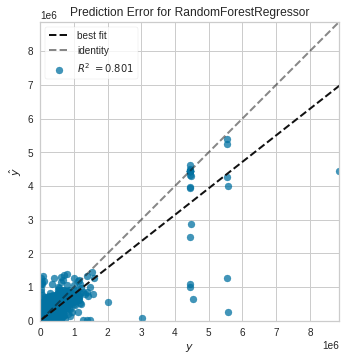

In [ ]:
model = rf
visualizer = PredictionError(model)

visualizer.fit(X_train, Y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
visualizer.show()

# Phase 2 - Deep Learning

* Now we have to import the preprocessed data to run neural networks on the data , the data is normalized between 0 to 1

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/RF+NN/dataset.csv')

In [ ]:
del df['Unnamed: 0']

In [ ]:
import tensorflow as tf

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
df=df.dropna()
X = df
y = df.pop('Total Costs')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=40)

In [ ]:
from numpy.ma.core import shape
from keras import layers
from keras.layers import Dropout

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, TimeDistributed
from keras.wrappers.scikit_learn import KerasRegressor
from keras import optimizers

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def regression_model():
    # Define model
    model = Sequential()
    model.add(Dense(32*9, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32*9, activation='relu'))
    model.add(Dense(64*8, activation='relu'))
    model.add(Dense(1, activation='linear'))
    # Compile model
    adam = tf.keras.optimizers.Adam(lr=0.001)
    model.compile(loss='mean_squared_error', optimizer=adam,metrics=['accuracy'])

    return model

# Use KerasRegressor wrapper (from Keras to sklearn)
# The packages we use are meant to be run with sklearn models
estimator = KerasRegressor(build_fn=regression_model, validation_split = 0.2, batch_size=1000, epochs=50, verbose=0)
history = estimator.fit(X_train, y_train)

In [ ]:
estimator.model.save('neuralmodel_2.h5')

In [ ]:
new_model = tf.keras.models.load_model('neuralmodel_2.h5')


In [ ]:
from sklearn.metrics import r2_score
pre=new_model.predict(X_test)
r2=r2_score(y_test,pre)

In [ ]:
print(r2)

0.8217285664120255


In [ ]:
#import necessary libraries
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate RMSE
sqrt(mean_squared_error(y_test, pre))

0.343572795268529

In [ ]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.show()

# Feature Extraction using neural network

**We use various feature information gathering methods to filter down the important ones using Shap Values, Permutation Importance and Partial Dependence Plot**

In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 36.3 MB/s 


In [ ]:
import shap

In [ ]:
def f_wrapper(X):
    return estimator.predict(X).flatten()

* By SHAP

  0%|          | 0/400 [00:00<?, ?it/s]

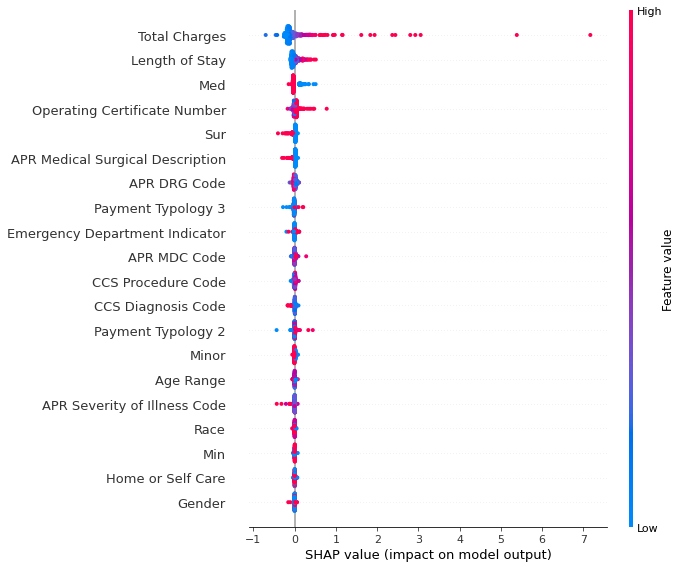

In [ ]:
X_train_summary = shap.kmeans(X_train, 20)

# Compute Shap values
explainer = shap.KernelExplainer(f_wrapper,X_train_summary)

# Make plot with combined shap values
# The training set is too big so let's sample it. We get enough point to draw conclusions
X_train_sample = X_train.sample(400)
shap_values  = explainer.shap_values(X_train_sample)
shap.summary_plot(shap_values, X_train_sample)

* By permutation importance method

In [ ]:
!pip install eli5

     |████████████████████████████████| 106 kB 18.8 MB/s 


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(estimator, random_state=1).fit(X_train,y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())


Weight,Feature
1.9703 ± 0.0788,Total Charges
0.7309 ± 0.0430,Operating Certificate Number
0.2972 ± 0.0342,CCS Procedure Code
0.2778 ± 0.0551,APR DRG Code
0.2682 ± 0.0141,APR MDC Code
0.2586 ± 0.0242,Length of Stay
0.1022 ± 0.0179,Med
0.0545 ± 0.0148,Emergency Department Indicator
0.0522 ± 0.0192,Payment Typology 3
0.0448 ± 0.0123,CCS Diagnosis Code


* Partial Dependence Plot

In [ ]:
!pip install pdpbox

     |████████████████████████████████| 34.0 MB 5.1 MB/s 
     |████████████████████████████████| 13.1 MB 18.1 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=f08f9c17fe8c0f9ba3ff080eb87b83cbc4c50784f05c055708a6588ddcb70312
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
features=['Operating Certificate Number','Length of Stay',
'CCS Diagnosis Code',
'CCS Procedure Code',
'APR DRG Code',
'APR MDC Code',
'APR Severity of Illness Code',
'Total Charges',
'Gender',
'Age Range' ,
'Race',
'Disposition',
'Admission Type',
'Emergency Department Indicator',
'Abortion Edit Indicator',
'Ethnicity',
'APR Severity of Illness Description',
'APR Risk of Mortality',
'APR Medical Surgical Description',
'Payment Typology 1',
'Payment Typology 2',
'Payment Typology 3',
'Home or Self Care',
'Extreme',
'Minor',
'Med',
'Sur',
'Ext',
'Min']

In [ ]:
from pdpbox import pdp, get_dataset, info_plots

# Gather pdp data
pdp_los = pdp.pdp_isolate(model = estimator,
                                dataset = X_train,
                                model_features = features,
                                feature='Length of Stay')

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


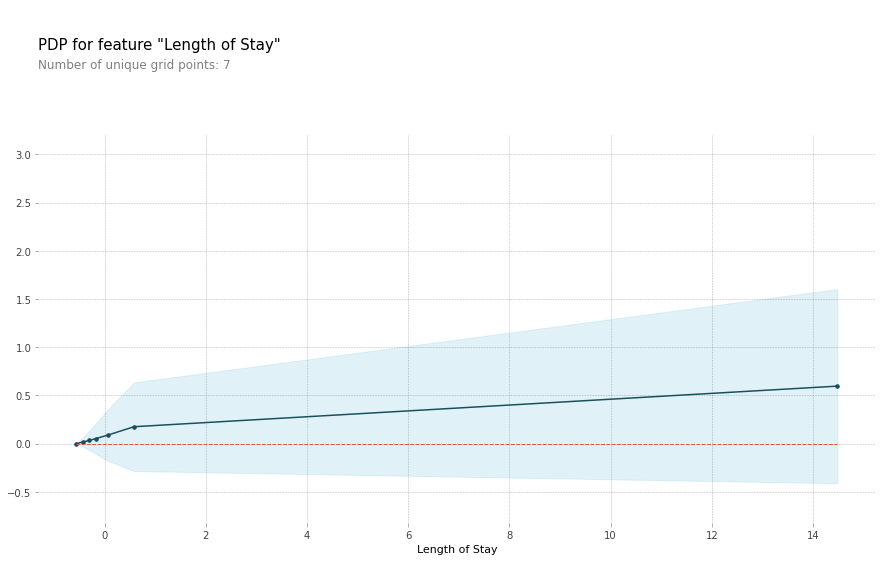

In [ ]:
pdp.pdp_plot(pdp_los, 'Length of Stay',
             x_quantile=False,
            plot_pts_dist=False)
plt.show()

# Using the significant features from that we learnt in neural networks to use on random forest

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

# To ignore any warnings
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/RF+NN/dataset.csv')

In [ ]:
del df['Unnamed: 0']

In [ ]:
finalfeatures=['Total Charges', 'Operating Certificate Number', 'APR DRG Code', 'Length of Stay', 'CCS Procedure Code', 'APR MDC Code', 'Med', 'Total Costs']

In [ ]:
df2=df[finalfeatures]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
df=df.dropna()
X = df2
y = df2.pop('Total Costs')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=40)

In [ ]:
rf = RandomForestRegressor(n_estimators=35, depth=50)

In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=35)

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)

In [ ]:
print(r2)

0.8731715401839102


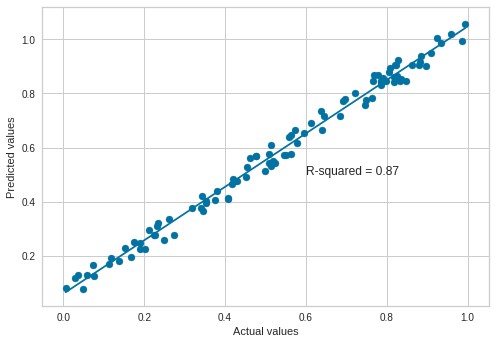

In [ ]:
y_test = np.random.rand(100) # Random Data
y_pred = y_test + np.random.rand(100)*0.1 # Random Data

r_squared = 0.87
plt.scatter(y_test,y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)))

plt.text(0.6, 0.5, 'R-squared = %0.2f' % r_squared)
plt.show()


# Thus this deep hybrid learning model has achieved a accuracy rate of 87% which is much better than random forest and neural network alone separately